In [ ]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

#Outlier Exercise 1

### Using IQR:

In [ ]:
df_heart = pd.read_csv('https://raw.githubusercontent.com/raneemsultan/DataEngineering-CSEN1095/main/Lab5/CSVs/heart.csv')

In [ ]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df_heart.shape

(303, 14)

In [ ]:
Q1 = df_heart['chol'].quantile(0.25)
Q3 = df_heart['chol'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

63.5


In [ ]:
arr_1 = df_heart['chol'] < (Q1 - 1.5 * IQR)
arr_2 = df_heart['chol'] > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)

In [ ]:
print("No. of outliers: ", mask.sum())

No. of outliers:  5


In [ ]:
#Removing the outliers
df_heart_cleared_iqr = df_heart[~(mask)]
df_heart_cleared_iqr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
print(df_heart.shape)
print(df_heart_cleared_iqr.shape)

(303, 14)
(298, 14)


### Using LOF

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/raneemsultan/DataEngineering-CSEN1095/main/Lab5/CSVs/heart.csv')
X = df[['age','chol']].values

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)

mask = yhat != -1
X_filtered = X[mask, :]

# summarize the shape of the updated dataset
print(X.shape)
print(X_filtered.shape)

(303, 2)
(291, 2)


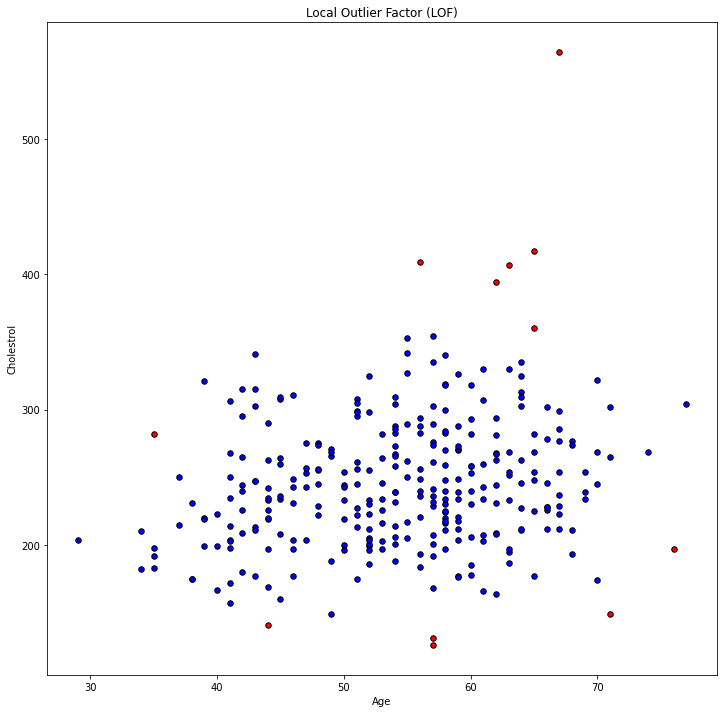

In [ ]:
# A visualization of the outliers
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in yhat]
out_mask = [True if l == -1 else False for l in yhat]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('Cholestrol');
plt.show()

-----

#Outlier Exercise 2

Using the insurance dataset(https://raw.githubusercontent.com/raneemsultan/DataEngineering-CSEN1095/main/Lab2/CSVs/insurance.csv) find the number of outliers in the charges column using the z-score method.

In [ ]:
df_insurance = pd.read_csv('https://raw.githubusercontent.com/raneemsultan/DataEngineering-CSEN1095/main/Lab2/CSVs/insurance.csv')
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
z = np.abs(stats.zscore(df_insurance['charges']))

In [ ]:
filtered_entries = z < 3

In [ ]:
df_zscore_filter = df_insurance[filtered_entries]
print(df_zscore_filter.shape)

(1331, 7)


In [ ]:
outliers_count = (z >=3).sum()
print(outliers_count)

7
